In [34]:
import requests
from pprint import pprint

# Alpha Store
<p> Como a aplicação roda apenas á nível de API, resolvi criar este notebook para que se possa testar as rotas.</p>
<p>Obs: Tudo que é criado aqui é persistido no banco de dados principal da aplicação </p>

### Register New User

```python
api_url = "/apis/v1/user/register/"
```



In [35]:
## Registr um novo usuário

user_data = {
    "username": "Knuckles2",
    "email": "knuckles2@sonic.com",
    "password": "Supersecre@valid1"
}

api_url = "http://127.0.0.1:5000/apis/v1/user/register"

response = requests.post(api_url, json=user_data)

pprint(response.json())

## Ao tentar registrar um usuário com o mesmo email ou senha, a API irá retornar um erro

user_data = {
    "username": "Knuckles2",
    "email": "knuckles2@sonic.com",
    "password": "Supersecre@valid1"
}

response = requests.post(api_url, json=user_data)

print(response.json())

##Ao criar um usuário, muitas outras validações são feitas pelo lado do servidor, como checagem da senha e username.
##Apenas modificando o json acima, você poderá ver algumas delas

{'message': 'User created successfully', 'status_code': 201}
{'message': 'Invalid input data: email: Email already exists', 'status_code': 400}


### Login de Usuário e User Features

Para logar com um usário, esta aplicação utiliza o plugin ``Flask-Login``. Além de adicionar alguns métodos adicionais ao objeto User(Note que User também herda de UserMixin),
este plugin utiliza dados da seção para verificar se há algum usuário logado. <br>
Com isto, o endpoint das rotas de authenticação tem acesso ao objeto current_user, que é um wrapper do modelo de Usuários. <br>
O Decorador ``@login_required`` irá basicamente verificar se ``current_user.is_authenticated`` é True, para verificar se o usuário está logado na seção. <br>
Quando a função login_user é chamada, ela salva o estado de login do usuário na seção atual.
Por outro lado, ``logout_user`` remove o usuário da seção, o que torna current_user.is_authenticated False.
Como os dados da seção são READ-ONLY, nenhum dado pessoal do usuário é salvo na seção, apenas um status para verificar se alguém logado!

As células abaixo mostram uma pipeline para o login de usuário:


```python
api_url = "apis/v1/user/login/
```

In [36]:
## Faz login com o usuário criado anteriormente
## Desta fez, precisamos do objeto Session para manter o usuário logado

session = requests.Session()

user_data = {
    "email": "knuckles2@sonic.com",
    "password": "Supersecre@valid1"
}

api_url = "http://127.0.0.1:5000/apis/v1/user/login"

response = session.post(api_url, json=user_data)

pprint(response.json())


## Novamente, muitas outras verificações são feitas pelo servidor. As mensagens de erros
## são bem claras e fáceis de entender. Tente mudar o json acima para ver algumas delas


{'message': 'Logged in successfully', 'status_code': 200}


In [37]:

## Abaixo, iremos tentar acessar uma rota que requer autenticação
## Irei fazer isso de duas formas: utilizando o objeto Session e sem ele

api_url = "http://127.0.0.1:5000/apis/v1/user/cart"

response = session.get(api_url)

print("Tentativa com o objeto Session")
pprint(response.json())

response = requests.get(api_url)
print("\n\n\n Tentativa sem objeto Session")
pprint(response.text)



Tentativa com o objeto Session
{'cart_id': 19,
 'message': 'Cart retrieved successfully',
 'products': [],
 'shipping_cost': 0,
 'status_code': 200,
 'total_items': 0,
 'total_price': 0}



 Tentativa sem objeto Session
'{\n  "message": "Unauthorized",\n  "status_code": 401\n}\n'


In [38]:
## Como podemos ver, a primeira tentativa de acesso à rota foi bem sucedida, enquanto a segunda falhou
## Vamos deixar o usuário um pouco mais feliz, adicionando alguns produtos ao carrinho dele
## Antes de fazer isso, precisamos saber quais produtos estão disponíveis
## Por isto, abaixo irei listar todos os produtos disponíveis
## A API de catalog possui algumas funcionalidades que irei mostrar á diante. 

api_url = "http://127.0.0.1:5000/apis/v1/catalog/get_products"

response = session.get(api_url)

## Aqui, irei capturar apenas o primeiro produto. Novamente, irei detalhar essa rota depois.

first_product = response.json()["products"][0]
pprint(first_product)


{'added_at': 'Sun, 12 Feb 2023 02:31:20 GMT',
 'category': 'Shooter',
 'description': 'Quaerat porro modi sit Sed labore amet dolore etincidunt non '
                'est ipsum Dolore etincidunt est eius consectetur sed ipsum ut',
 'id': 13,
 'image_url': 'call-of-duty-infinite-warfare.png',
 'name': 'Call Of Duty Infinite Warfare',
 'price': 49.99,
 'release_date': 'Fri, 04 Nov 2016 02:00:00 GMT',
 'score': 80.0}


In [39]:

## Agora, irei adicionar o produto ao carrinho do usuário
## Para isso, irei utilizar a rota /apis/v1/user/add_to_cart
## Esta rota recebe um json com o id do produto e, caso exista, adiciona ao carrinho do usuário
## Neste projeto, supus que os jogos são virtuais, então não há nada sobre stock, endereço de entrega, etc.

## Para esta rota, decidi que o id do produto deverá ser passado como parâmetro na url.
## Assim, para adicionar o produto de id = 1 deve-se acessar /apis/v1/user/cart/add-to-cart/1

first_product_id = first_product["id"]
api_url = f"http://127.0.0.1:5000/apis/v1/user/cart/add-to-cart/{first_product_id}"

response = session.post(api_url)

pprint(response.json())


{'message': 'Product added to cart successfully', 'status_code': 200}


In [40]:
## Vamos novamente acessar a api de listagem de itens no carrinho:

api_url = "http://127.0.0.1:5000/apis/v1/user/cart"

response = session.get(api_url)

pprint(response.json())

{'cart_id': 19,
 'message': 'Cart retrieved successfully',
 'products': [{'added_at': 'Sun, 12 Feb 2023 02:31:20 GMT',
               'category': 'Shooter',
               'description': 'Quaerat porro modi sit Sed labore amet dolore '
                              'etincidunt non est ipsum Dolore etincidunt est '
                              'eius consectetur sed ipsum ut',
               'id': 13,
               'image_url': 'call-of-duty-infinite-warfare.png',
               'name': 'Call Of Duty Infinite Warfare',
               'price': 49.99,
               'release_date': 'Fri, 04 Nov 2016 02:00:00 GMT',
               'score': 80.0}],
 'shipping_cost': 10,
 'status_code': 200,
 'total_items': 1,
 'total_price': 59.99}


In [41]:
## Agora, vamos fazer o checkout!

api_url = "http://127.0.0.1:5000/apis/v1/user/cart/checkout"

response = session.post(api_url)

pprint(response.json())


{'message': 'Checkout successfully', 'status_code': 200}


In [42]:
## Também podemos ver o hitórico de pedidos na seguinte rota: 

api_url = "http://127.0.0.1:5000/apis/v1/user/orders"

response = session.get(api_url)

pprint(response.json())

{'message': 'Orders retrieved successfully',
 'orders': [{'added_at': 'Sun, 12 Feb 2023 20:17:39 GMT',
             'id': 14,
             'products': [{'added_at': 'Sun, 12 Feb 2023 02:31:20 GMT',
                           'category': 'Shooter',
                           'description': 'Quaerat porro modi sit Sed labore '
                                          'amet dolore etincidunt non est '
                                          'ipsum Dolore etincidunt est eius '
                                          'consectetur sed ipsum ut',
                           'id': 13,
                           'image_url': 'call-of-duty-infinite-warfare.png',
                           'name': 'Call Of Duty Infinite Warfare',
                           'price': 49.99,
                           'release_date': 'Fri, 04 Nov 2016 02:00:00 GMT',
                           'score': 80.0}],
             'shipping_cost': 10.0,
             'total_price': 49.99,
             'user_id': 6}],
 'st

In [43]:
## Por último, vamos fazer logout

response = session.post("http://127.0.0.1:5000/apis/v1/user/logout")

pprint(response.json())

{'message': 'Logged out successfully', 'status_code': 200}


### A interface Catalog
<p> Nesta aplicação foi implementado também endpoints para capturar itens no catalogo. Estas rotas são públicas e permitem realizar alguns filtros na busca por dados </p>

In [44]:
### Buscando um determinado produto por nome.
### Nesta rota, o nome do produto deve ser passado na url.
### Assim, caso queira o produto Super Mario World, deve-se acesstar /apis/v1/catalog/get-products-by-name/Super Mario World

game_name = "Sekiro: Shadows Die Twice"
api_url = f"http://127.0.0.1:5000/apis/v1/catalog/get_products_by_name/{game_name}"

response = requests.get(api_url)

pprint(response.json())

{'message': 'Product found',
 'product': {'added_at': 'Sun, 12 Feb 2023 02:31:20 GMT',
             'category': 'Action',
             'description': 'Tempora amet quaerat dolorem magnam Quaerat '
                            'dolore ut quisquam magnam tempora Labore quiquia '
                            'ipsum dolore Magnam amet tempora etincidunt porro',
             'id': 38,
             'image_url': 'sekiro-shadows-die-twice.png',
             'name': 'Sekiro: Shadows Die Twice',
             'price': 59.99,
             'release_date': 'Fri, 22 Mar 2019 03:00:00 GMT',
             'score': 450.0},
 'status_code': 200}


In [45]:
### De forma similar, podemos também obter um determinado produto pelo seu id:

product_id = 22
api_url = f"http://127.0.0.1:5000/apis/v1/catalog/get_products_by_id/{product_id}"

response = requests.get(api_url)

pprint(response.json())

{'message': 'Product found',
 'product': {'added_at': 'Sun, 12 Feb 2023 02:31:20 GMT',
             'category': 'Shooter',
             'description': 'Labore magnam velit modi ut tempora dolor tempora '
                            'Velit modi modi dolore dolor labore etincidunt '
                            'velit Quaerat velit sed neque',
             'id': 22,
             'image_url': 'overwatch.png',
             'name': 'Overwatch',
             'price': 55.99,
             'release_date': 'Mon, 23 May 2016 03:00:00 GMT',
             'score': 130.0},
 'status_code': 200}


In [46]:
### Para a listagem de produtos, temos a rota /apis/v1/catalog/get-products
### Que aceita parâmetros de filtros e de sort para a busca.
### Se nenhum parâmetro for passado, a rota irá retornar os 10 primeiros itens
### Esta rota também contém uma quantidade máxima de produtos a serem buscados.


api_url = f"http://127.0.0.1:5000/apis/v1/catalog/get_products"

params = {"start": 0, "limit": 5, "sort_by": "price", "sort_type": "asc"}

response = requests.get(api_url, params=params)

pprint(response.json())

{'message': 'Products found',
 'products': [{'added_at': 'Sun, 12 Feb 2023 02:31:20 GMT',
               'category': 'Shooter',
               'description': 'Quaerat porro modi sit Sed labore amet dolore '
                              'etincidunt non est ipsum Dolore etincidunt est '
                              'eius consectetur sed ipsum ut',
               'id': 13,
               'image_url': 'call-of-duty-infinite-warfare.png',
               'name': 'Call Of Duty Infinite Warfare',
               'price': 49.99,
               'release_date': 'Fri, 04 Nov 2016 02:00:00 GMT',
               'score': 80.0},
              {'added_at': 'Sun, 12 Feb 2023 02:31:20 GMT',
               'category': 'Fighting',
               'description': 'Velit est quiquia quaerat Quaerat ipsum ut non '
                              'modi dolorem neque non Neque adipisci labore '
                              'quaerat neque Porro quisquam sit',
               'id': 16,
               'image_url': 'm

# Analytics Interface

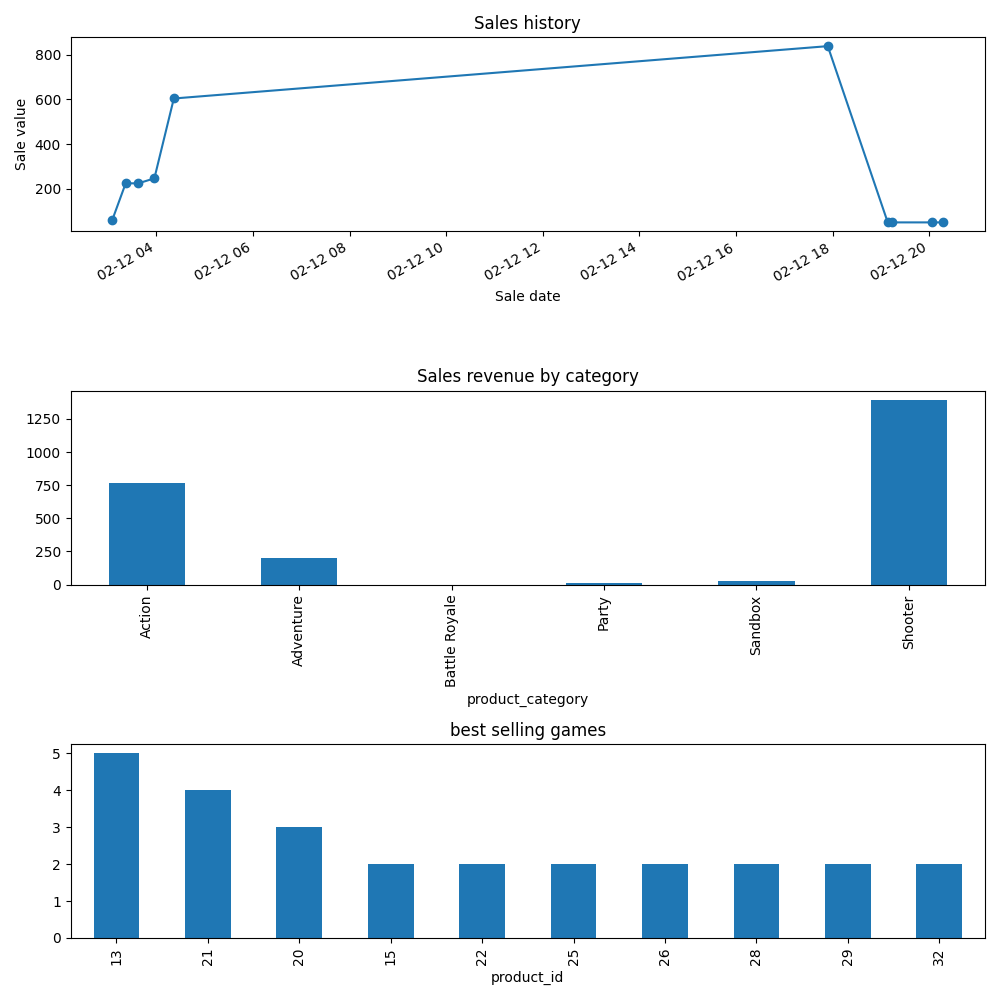

In [47]:
### Por fim, esta aplicação também dispõe de uma aplicação simples que gera um report das vendas
### O Report é muito básico, e o endpoint não tem autenticação, mesmo assim decidi incluí-lo aqui:

api_url = "http://127.0.0.1:5000/apis/v1/analytics/report"

response = requests.get(api_url)


### Este endpoint irá retornar um código html contendo a imagem em base64. Ao abrir o link ``api_url`` em algum navegador, você poderá ver a imagem.
### neste notebook, irei utilizar BytesIO e PIL para ler esta imagem

### Primeiro, irei parsear a string de response.
img_bytes_raw = response.text

import re
import base64
import io
from PIL import Image

regex = re.compile(r'data:image\/[a-zA-Z]+;base64,([a-zA-Z0-9+/]+={0,2})')
base64_code = regex.search(img_bytes_raw)
base64_code = base64_code.group(1)
img_data = base64.b64decode(base64_code)

img = Image.open(io.BytesIO(img_data))


#img.show()
img